# CREDIT CARD HOAX DETECTION

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In this project, we will start with exploratory data analysis (EDA) to get a better understanding of the data. Next, we will perform data processing and modeling, where we will build several classification models to predict fraudulent transactions. We will also address the issue of imbalanced classes by using undersampling. Finally, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as precision, recall, F1-score, and accuracy.

In [3]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

In [4]:
df = pd.read_csv('creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

## EXPLORATORY DATA ANALYSIS

In [3]:
# Printing random sample of 10 rows to check data loading
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247490,153593.0,-0.720471,-0.783012,1.485179,-2.756456,-0.614549,0.158707,-0.119227,0.142082,-2.503460,...,-0.041385,0.000159,-0.092738,0.669605,0.561647,-0.107404,0.001758,0.059060,99.40,0
115916,74070.0,1.040883,-0.393775,-0.064906,-0.842390,-0.441865,-0.877371,0.242547,-0.262548,0.935372,...,0.198965,0.551391,-0.244773,0.150537,0.723309,-0.580796,0.049056,0.039458,119.80,0
170570,120247.0,-0.727523,0.590562,1.161793,0.821456,0.188427,0.254625,0.221172,0.139245,0.051385,...,-0.057829,-0.219832,0.126697,-0.490851,-0.933429,-0.909737,-0.173332,0.321260,31.40,0
41084,40526.0,1.277275,-0.991641,0.530583,-0.815969,-1.075601,0.207389,-1.117068,0.173496,-0.185046,...,0.376648,0.897847,-0.214821,-0.750316,0.407622,0.030076,0.034873,0.021661,69.99,0
196141,131374.0,0.050043,0.849205,0.265843,-0.597594,0.422381,-1.102349,0.983577,-0.187944,0.000205,...,-0.268653,-0.603918,0.060394,-0.037988,-0.490610,0.143047,0.246088,0.096131,0.89,0
126333,77985.0,-3.339029,2.330076,0.558414,0.716446,-0.506675,-0.511691,0.487365,-0.249708,0.362949,...,0.181870,0.527313,-0.036222,0.651185,0.477700,-0.409633,-2.236628,-0.261678,22.40,0
52320,45386.0,1.219975,0.167234,0.383895,0.528342,-0.376446,-0.682994,-0.013884,-0.096325,-0.218752,...,0.098458,0.302602,-0.094744,0.381398,0.499853,0.410730,-0.037912,0.001714,5.90,0
58014,48191.0,1.279252,-0.205514,-1.065516,-0.333508,1.961197,3.547022,-0.602183,0.866913,0.344186,...,-0.283708,-0.799273,-0.025416,1.033412,0.609108,0.284247,-0.021336,0.006677,11.08,0
29114,35328.0,-2.280510,-1.270713,-0.343805,-1.115166,-4.501903,2.785883,2.251862,-4.248874,-0.789066,...,-1.572430,0.599341,-7.474414,0.786035,-2.174441,-0.552313,1.226567,-0.738261,1762.20,0
260382,159534.0,2.015218,-0.329000,-0.285154,0.127584,-0.794922,-0.890876,-0.499988,-0.106376,1.267396,...,-0.145983,-0.304495,0.391273,0.015228,-0.522084,-0.270128,0.008044,-0.036308,1.00,0


We can only work with three non-transformed variables which are Time, Amount, and Class (where Class takes values of 1 for fraud and 0 for not fraud).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Printing numerical summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


C:\Users\yukti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Time Distribution (Seconds)'}, xlabel='Time', ylabel='Density'>

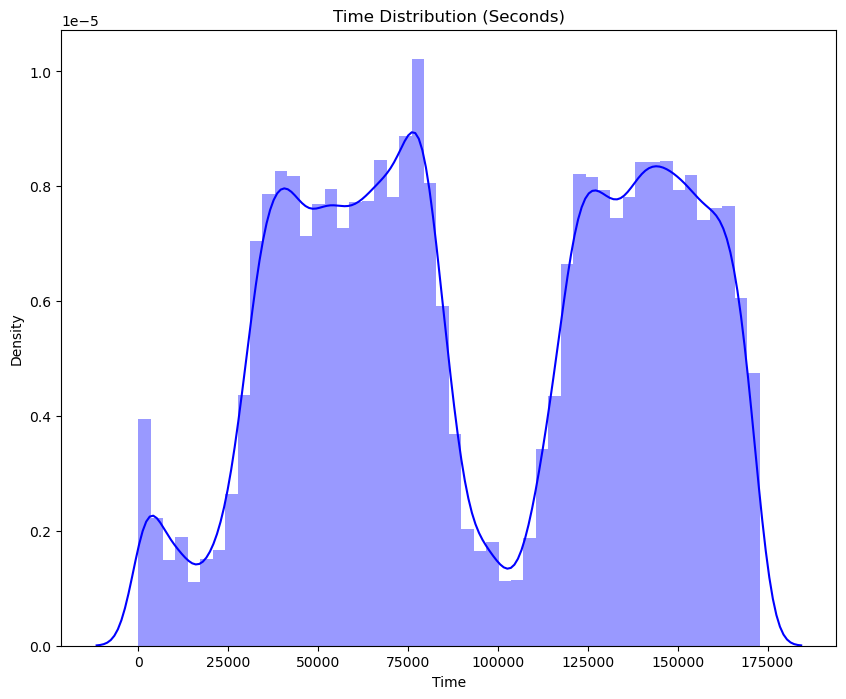

In [74]:
#Histogram Plot of Time column
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue')

From the plot, we can observe that the Time feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

C:\Users\yukti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

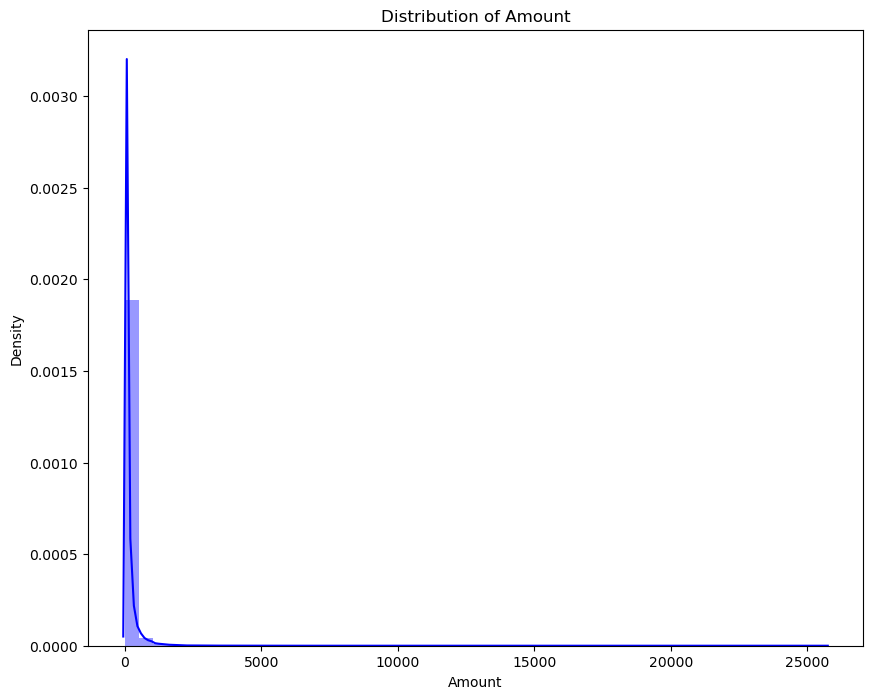

In [6]:
#Histogram plot of Amount column
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')

From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. As a result, this suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the Amount feature, for instance, by using a log transformation or robust statistical methods.

Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

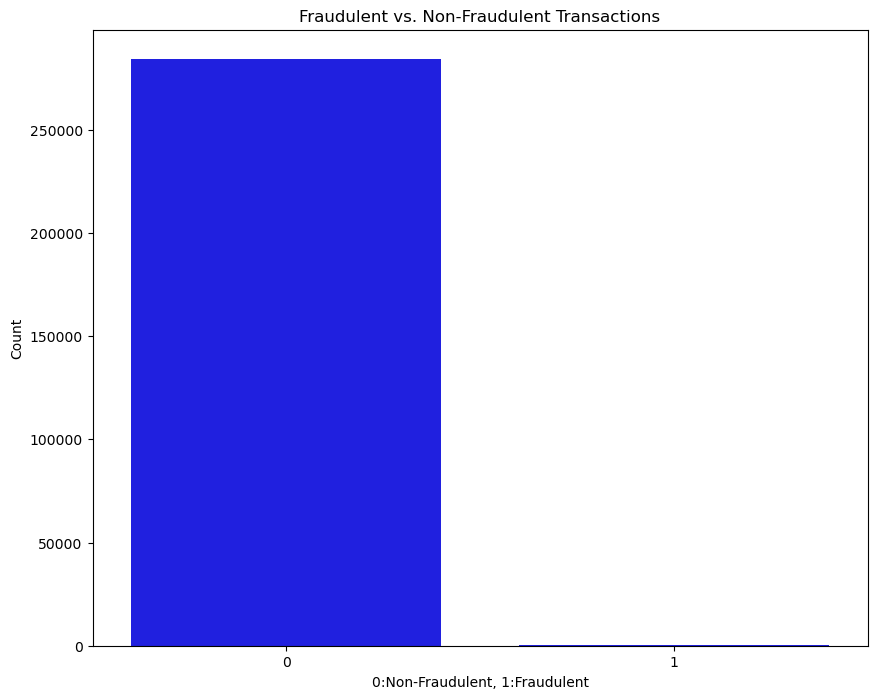

In [7]:
#Bar plot of Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

In [8]:
# Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 492, Non-fraudulent: 284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


## DATA PROCESSING

<AxesSubplot:>

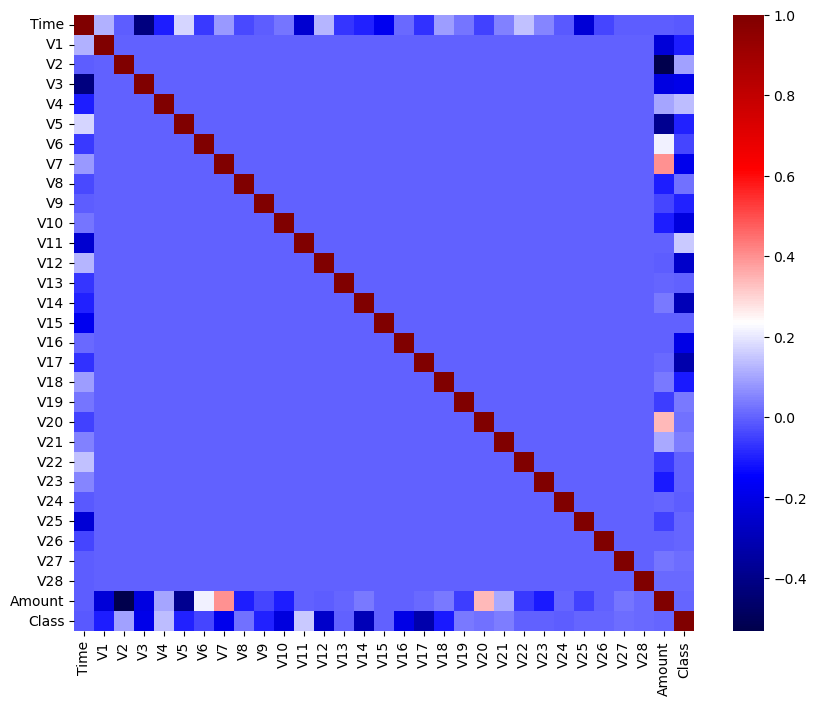

In [10]:
## Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)

From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:

Time and V3, with a correlation coefficient of -0.42
Amount and V2, with a correlation coefficient of -0.53
Amount and V4, with a correlation coefficient of 0.4. 
Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

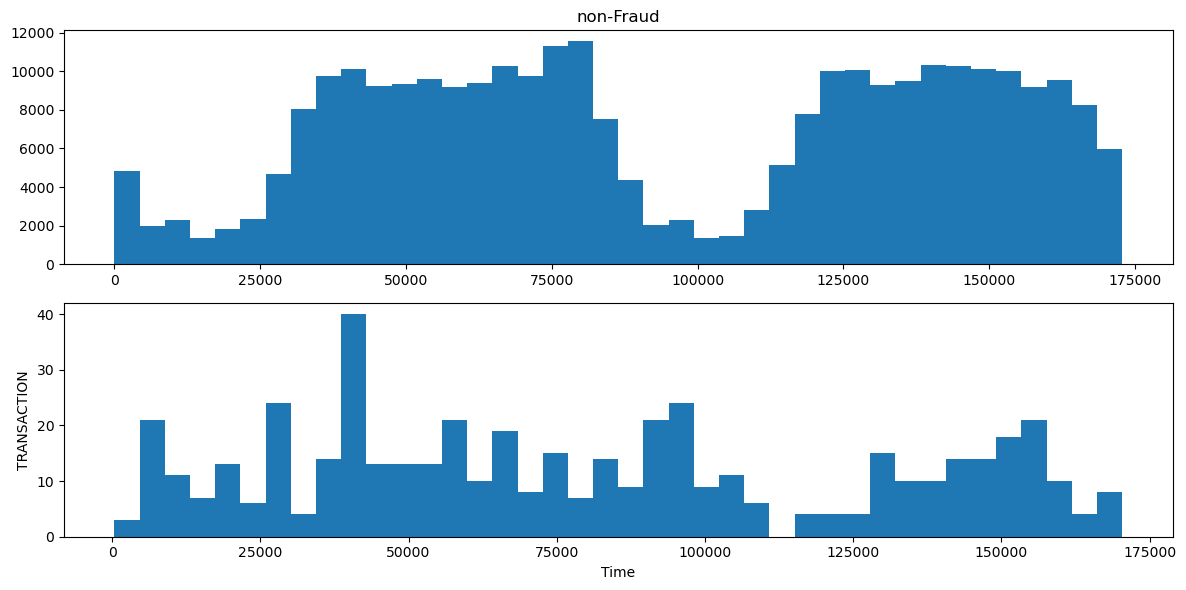

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,6))
ax[0].hist(df['Time'][df['Class']==0],bins=40)
ax[1].hist(df['Time'][df['Class']==1],bins=40)
ax[0].set_title('non-Fraud')
ax[0].set_title('non-Fraud')
plt.xlabel('Time')
plt.ylabel('TRANSACTION')
plt.tight_layout()

## MODELING

The "Credit Card Fraud Detection" dataset has credit card transactions labeled as fraudulent or not. The dataset is imbalanced, so it needs a model that can accurately detect fraudulent transactions without wrongly flagging non-fraudulent transactions. 

To help with classification problems, StandardScaler standardizes data by giving it a mean of 0 and a standard deviation of 1, which results in a normal distribution. This technique works well when dealing with a wide range of amounts and time. To scale the data, the training set is used to initialize the fit, and the train, validation, and test sets are then scaled before running them into the models. 

The dataset was divided into 60% for training, 20% for validation, and 20% for testing. To balance the imbalanced dataset, Random Undersampling was used to match the number of fraudulent transactions. Logistic Regression and Random Forest models were used, and good results were produced. 

The commonly used models I used here for the "Credit Card Fraud Detection" dataset are Logistic Regression, Random Forest
Logistic Regression is widely used for fraud detection because of its interpretability and ability to handle large datasets. 
Random Forest is commonly used for fraud detection because it can handle complex datasets and is less prone to overfitting. 

In [12]:
# Drop the 'Class' column to prepare data for splitting
x = df.drop(columns=['Class'])
# Get the target variable
y = df['Class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split data into training, and test sets, ensuring the class distribution is maintained
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

In [15]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
150644,93823.0,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,2.305609,-5.338079,...,1.115247,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850,75.86
284683,172676.0,1.915474,-0.217019,-0.521731,1.274430,-0.124715,0.351640,-0.502276,0.170470,0.773668,...,-0.229787,0.259944,1.013752,0.060780,0.726831,0.154690,-0.480588,0.047439,-0.042786,5.90
11821,20291.0,1.188218,-0.265995,1.028003,-0.570025,-0.897195,-0.288048,-0.683397,-0.016821,2.997323,...,-0.136653,-0.121334,0.193611,-0.011301,0.056384,0.423882,-0.698840,0.086034,0.028664,10.85
105363,69485.0,1.280914,-0.678647,0.510401,-0.021436,-0.860837,0.418607,-0.856899,0.276844,-0.456776,...,-0.634473,-0.431930,-0.581050,0.010893,-0.318288,0.338770,0.450009,0.017050,-0.003732,1.00
168046,119043.0,2.110011,-0.129116,-1.371511,0.262318,0.118868,-0.838070,0.114082,-0.243813,0.714112,...,-0.254634,-0.344101,-0.894192,0.264555,-0.677372,-0.234213,0.241541,-0.077081,-0.068689,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227547,145118.0,-2.385402,2.694298,-1.559728,-1.093803,0.461760,-0.878016,0.985802,-0.023828,1.973455,...,1.233881,-0.739629,-0.969840,0.234132,0.467902,0.085477,0.114407,0.821430,0.281757,17.99
177847,123369.0,1.782141,-0.593134,-1.393531,0.256798,-0.256413,-0.989643,0.196439,-0.227141,0.248380,...,0.004792,0.340797,0.752416,-0.049647,0.079509,-0.072269,0.756462,-0.119480,-0.059778,131.40
256810,157877.0,2.111294,0.317328,-2.495331,1.181324,1.031098,-1.151331,0.931180,-0.431308,-0.040300,...,-0.392207,0.277230,0.897966,-0.169974,0.651934,0.839757,-0.215343,-0.066201,-0.077032,1.00
12905,22666.0,1.206553,-0.205390,1.193460,-0.443671,-1.235657,-0.942281,-0.591043,-0.181820,2.964621,...,-0.107512,-0.125863,0.146266,-0.002519,0.696536,0.455966,-0.749166,0.070392,0.035753,11.85


#### Using Logistic regression 
#### 1)Without standard scaling and undersampling and over sampling 

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel=LogisticRegression()

In [18]:
logmodel.fit(x_train,y_train)

C:\Users\yukti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predictions=logmodel.predict(x_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.69      0.75      0.72       142

    accuracy                           1.00     85443
   macro avg       0.84      0.88      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))

[[85253    48]
 [   35   107]]


In [24]:
print('ACCURACY:{}'.format(accuracy_score(y_test,predictions)))

ACCURACY:0.9990285921608558


C:\Users\yukti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


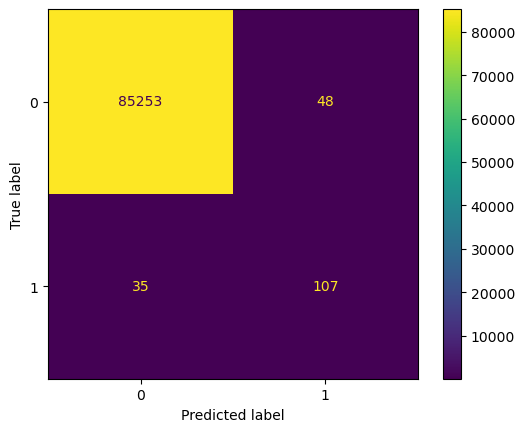

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,x_test,y_test)

#### using standard scaler and undersampling 

In [36]:
df_clean=df.copy()

In [37]:
## Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()

In [38]:
# Scale the training, validation, and test sets using the scaler
df_clean['std_amount']=scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time']=scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean.drop(['Time','Amount'],axis=1,inplace=True)

In [39]:
X=df_clean.drop('Class',axis=1)
Y=df['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=200)

In [40]:
!pip3 install imblearn

In [41]:
# Undersampling will be utilized to address the issue of imbalanced classes.

from imblearn.under_sampling import RandomUnderSampler

In [43]:
# Instantiate RandomUnderSampler
rus = RandomUnderSampler()

In [44]:
X_rus, Y_rus = rus.fit_resample(X_train, Y_train)

C:\Users\yukti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

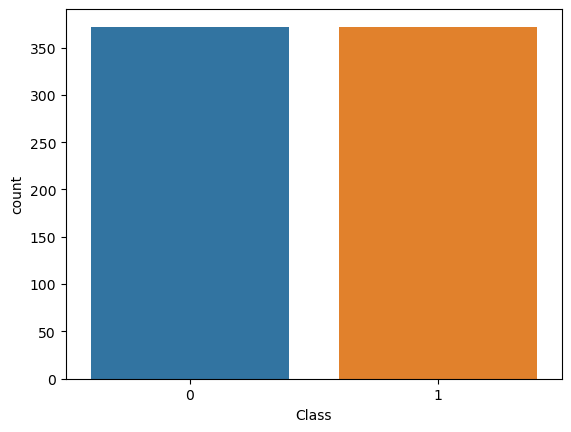

In [45]:
sns.countplot(Y_rus)

In [46]:
logmodel.fit(X_rus,Y_rus)

LogisticRegression()

In [47]:
predictions1=logmodel.predict(X_test)

In [48]:
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.93      0.11       120

    accuracy                           0.97     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [54]:
print('ACCURACY:{}'.format(accuracy_score(Y_test,predictions1)))

ACCURACY:0.9749726131288446


In [50]:
print(confusion_matrix(Y_test,predictions1))

[[69308  1774]
 [    8   112]]


In [51]:
!pip install -q scikit-plot

In [52]:
import scikitplot as skplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

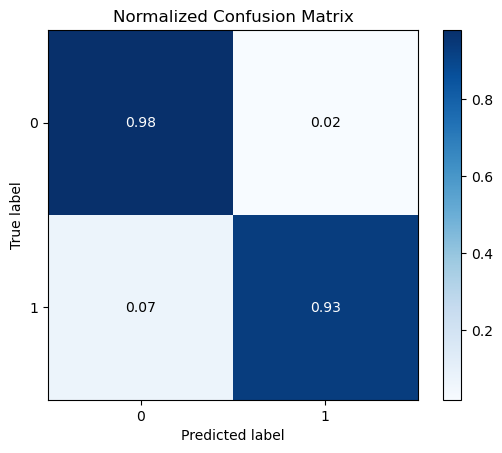

In [53]:
skplt.metrics.plot_confusion_matrix(Y_test,predictions1,normalize=True)

### Using RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=600)

In [57]:
rfc.fit(X_rus,Y_rus)

RandomForestClassifier(n_estimators=600)

In [58]:
predictions2 = rfc.predict(X_test)

In [59]:
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.08      0.90      0.15       120

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [60]:
print('ACCURACY:{}'.format(accuracy_score(Y_test,predictions2)))

ACCURACY:0.9824443133619842


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

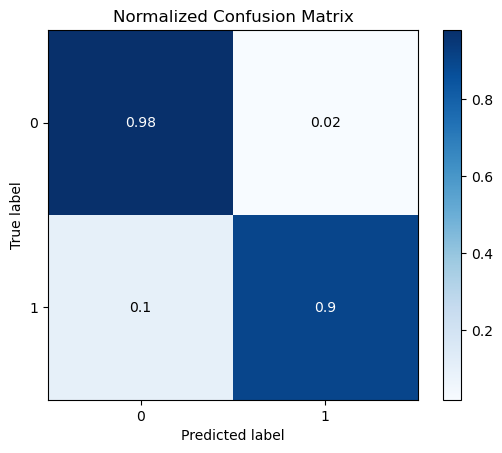

In [62]:
skplt.metrics.plot_confusion_matrix(Y_test,predictions2,normalize=True)

##### Conclusion: 
After using Random forect we find the accuracy increased from 97.49 in logistic to 98.24 as it first lowers overfitting. Second, by lowering the variance in the trees predictions, it improves the model's stability and accuracy.